
<div class="markdown-google-sans">
  <h2>SolTranNet
</h1>
</div>

Here we will find the model is reproduceble or not:)



*   Installing rdkit - [here](https://github.com/rdkit/rdkit/blob/a6f0493fddad16f77db19b389cb107a86bddb7f4/Docs/Book/Install.md)



In [58]:
pip install rdkit



*   Installing soltrannet -[here](https://github.com/gnina/SolTranNet)



In [59]:
pip install soltrannet

# Input data

In [60]:
import pandas as pd

In [61]:
df = pd.read_csv("/content/reference_library (1).csv")
df.head(3)

smiles
0                CCCCNC(=S)N/N=C/C1=C(C)C=CS1
1  CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1
2    O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Finding number of data samples

In [63]:
smiles_column = "smiles"


#finding number of smiles

import pandas as pd

#path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv("/content/reference_library (1).csv")
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES :)")

My dataset contains 1000 SMILES :)


# Validating SMILES :)

In [64]:
from rdkit import Chem

def is_smiles(smiles):
    return Chem.MolFromSmiles(smiles) is not None
all_valid = all(is_smiles(i) for i in smiles)

if all_valid:
    print("All samples are valid SMILES")
else:
    print("Not all samples are valid SMILES")

All samples are valid SMILES


# Doing Predictions

In [65]:
import soltrannet as stn

# Perform predictions
predictions = list(stn.predict(smiles))

# Add predictions to the input DataFrame
predictions_n  = [p[0] for p in predictions]
df['Solubility'] = predictions_n

# Write the updated DataFrame with predictions to a new CSV file
df.to_csv('output.csv', index=False)


/usr/local/lib/python3.10/dist-packages/soltrannet/data_utils.py:207: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  return [torch.FloatTensor(adjacency_list), torch.FloatTensor(features_list), smiles_list, index_list]


#  Predictions

In [66]:
op = pd.read_csv("/content/output.csv")
op.head(4)

smiles  Solubility
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1   -3.454118
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1   -4.501667
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl   -2.899651
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...   -4.776512

AS per intructions I ploted scatered plot! but seems like it is not visualizing what we really want to. SO, I prefered to visualize data in histogram. Now, we can easily see freqencies of each compond and their solubility

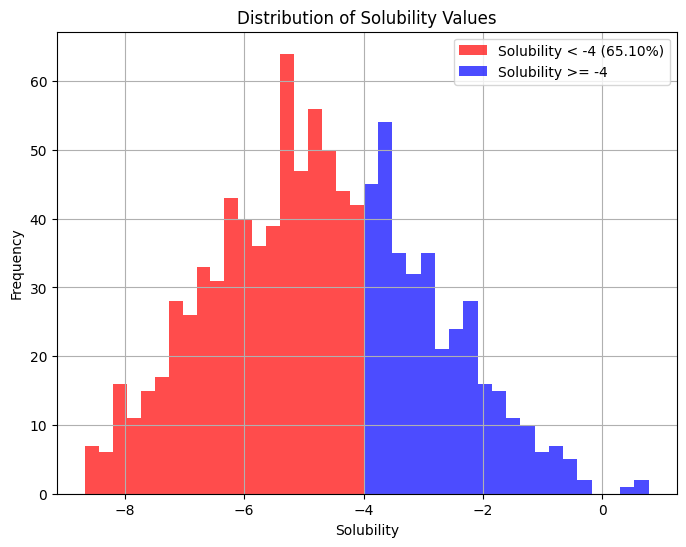

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the solubility values from the DataFrame
solubility_values = op['Solubility']

# Calculate the percentage of solubility values less than -4
percentage_less_than_minus_4 = (solubility_values < -4).mean() * 100

# Create two histograms: one for solubility values less than -4 and another for greater than or equal to -4
plt.figure(figsize=(8, 6))

# Histogram for solubility values less than -4
plt.hist(solubility_values[solubility_values < -4], bins=20, color='red', alpha=0.7, label=f'Solubility < -4 ({percentage_less_than_minus_4:.2f}%)')

# Histogram for solubility values greater than or equal to -4
plt.hist(solubility_values[solubility_values >= -4], bins=20, color='blue', alpha=0.7, label='Solubility >= -4')

plt.title('Distribution of Solubility Values')
plt.xlabel('Solubility')
plt.ylabel('Frequency')
plt.grid(True)

# Add legend
plt.legend()

plt.show()


### **Compounds can be classified according to solubility values (LogS); Compounds with 0 and higher solubility value are highly soluble, those in the range of 0 to −2 are soluble, those in the range of −2 to −4 are slightly soluble and insoluble if less than −4. lets find out how many of them are highly soluble, slightly soluble and insoluble**

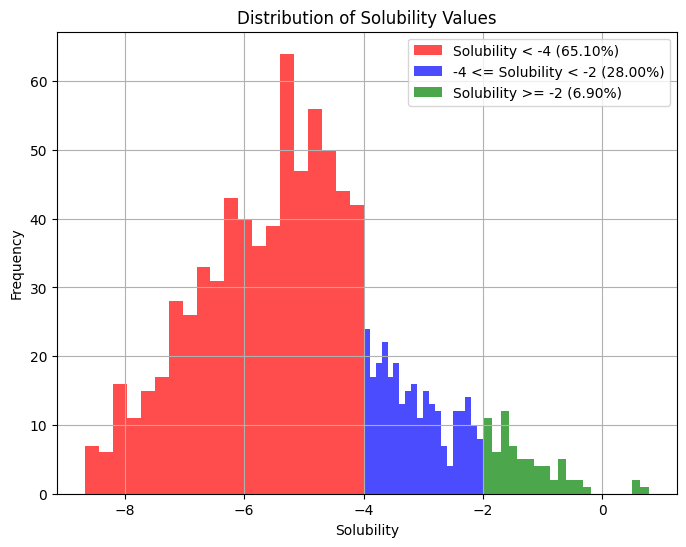

In [68]:


# Calculate the percentage of solubility values in each category
percentage_less_than_minus_4 = (solubility_values < -4).mean() * 100
percentage_minus_4_to_minus_2 = ((solubility_values >= -4) & (solubility_values < -2)).mean() * 100
percentage_above_minus_2 = (solubility_values >= -2).mean() * 100

# Create three histograms for each category
plt.figure(figsize=(8, 6))

# Histogram for solubility values less than -4
plt.hist(solubility_values[solubility_values < -4], bins=20, color='red', alpha=0.7, label=f'Solubility < -4 ({percentage_less_than_minus_4:.2f}%)')

# Histogram for solubility values between -4 and -2
plt.hist(solubility_values[(solubility_values >= -4) & (solubility_values < -2)], bins=20, color='blue', alpha=0.7, label=f'-4 <= Solubility < -2 ({percentage_minus_4_to_minus_2:.2f}%)')

# Histogram for solubility values greater than or equal to -2
plt.hist(solubility_values[solubility_values >= -2], bins=20, color='green', alpha=0.7, label=f'Solubility >= -2 ({percentage_above_minus_2:.2f}%)')

plt.title('Distribution of Solubility Values')
plt.xlabel('Solubility')
plt.ylabel('Frequency')
plt.grid(True)

# Add legend
plt.legend()

plt.show()

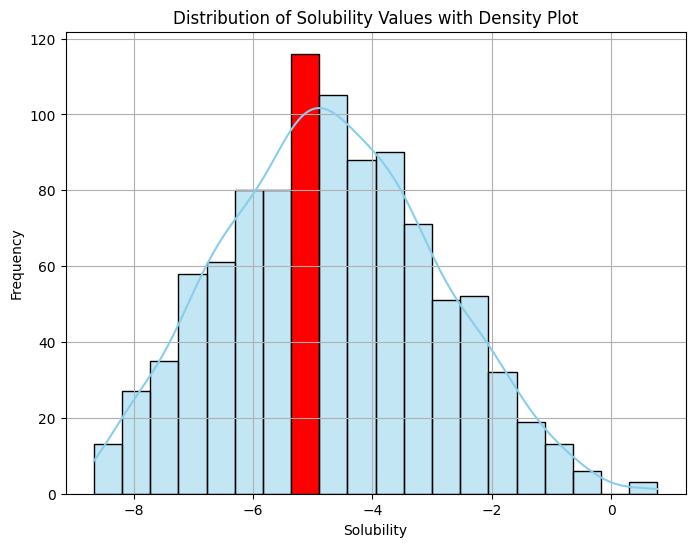

In [69]:
# Create a histogram with density plot
plt.figure(figsize=(8, 6))
sns.histplot(solubility_values, bins=20, kde=True, color='skyblue', edgecolor='black')

# Find the bin with the highest frequency
highest_bin = plt.gca().patches[max(range(len(plt.gca().patches)), key=lambda i: plt.gca().patches[i].get_height())]

# Highlight the bin with the highest frequency with a different color
highest_bin.set_facecolor('red')

plt.title('Distribution of Solubility Values with Density Plot')
plt.xlabel('Solubility')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Model bias evaluation**

here we can see that majority of predictions are in the middle of graph, from this we can infer that we can fine tune is model which can make easily help us to classify from this regression problem.

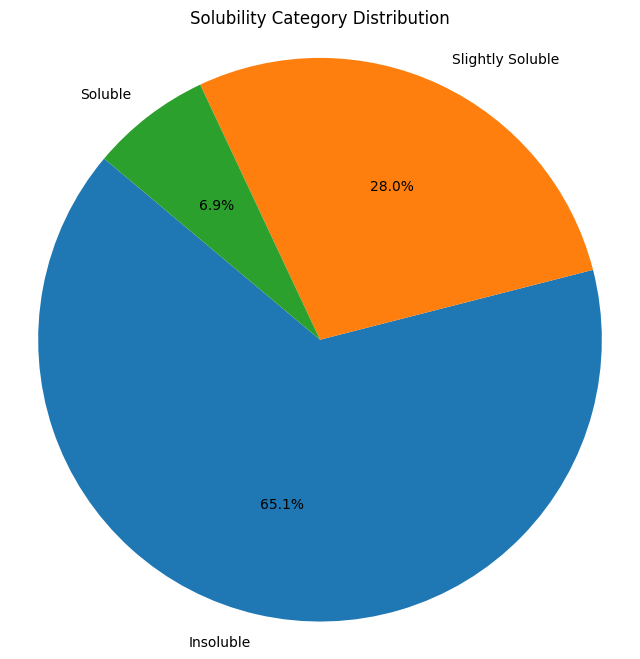

In [70]:
# Define the categories based on solubility values
def categorize_solubility(solubility):
    if solubility < -4:
        return 'Insoluble'
    elif solubility >= -4 and solubility < -2:
        return 'Slightly Soluble'
    else:
        return 'Soluble'

# Apply the categorization function to create a new column
op['Solubility Category'] = op['Solubility'].apply(categorize_solubility)

# Calculate the frequency distribution of solubility categories
frequency_distribution = op['Solubility Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequency_distribution, labels=frequency_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Solubility Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Majorty of predictions are insoluble! from this graph